In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('diabetes.csv',sep = ',')
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import time
# ganache_url = "HTTP://127.0.0.1:8545"
ropsten_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
# ropsten_url = "https://ropsten.infura.io/v3/a1f0f6389bcc4a2f90e2710985f3415e"
web3 = Web3(Web3.HTTPProvider(ropsten_url))
web3.isConnected()

True

In [40]:
abi = json.loads('[{ "inputs": [], "name": "add_print", "outputs": [ { "internalType": "int256", "name": "x", "type": "int256" }, { "internalType": "int256", "name": "y", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [ { "internalType": "int256[]", "name": "input", "type": "int256[]" }, { "internalType": "int256[]", "name": "w", "type": "int256[]" }, { "internalType": "int256[]", "name": "b", "type": "int256[]" } ], "name": "compute_IXWB", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "a", "type": "int256" }, { "internalType": "int256", "name": "b", "type": "int256" }, { "internalType": "int256", "name": "c", "type": "int256" }, { "internalType": "int256", "name": "d", "type": "int256" } ], "name": "compute_addition", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "x", "type": "int256" }, { "internalType": "int256", "name": "y", "type": "int256" } ], "name": "compute_lcm", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "d", "type": "int256" } ], "name": "compute_sigmoid", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "lcm_print", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "predict_print", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }]')
# cont_address = "0xFD9fFdE09432258482C532d80bBDB5c4577dc2DF"
# cont_address = "0xDBd0f216C38Dd54594A340CEeF63bCae637328ea" #ropsten
cont_address = "0xFD9fFdE09432258482C532d80bBDB5c4577dc2DF"   #ganache
account1 = "0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d"
private_key1 = "e72044de2331844a3c0232dc23d43fb8ca4f555854b4da07e2fb530d003e5e2d"
account2 = "0xfbD8f1F5878b0b5b3E627e7cc14617b05B582867"
private_key2="56c8f569b23a423f9d66d46f86f7ada7ba0d28dfba03c34f661bb15358b042bb"


In [41]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction']*100
df.DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.astype(int)
df.BMI = df.BMI.astype(int) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,62,50,1
1,1,85,66,29,0,26,35,31,0
2,8,183,64,0,0,23,67,32,1
3,1,89,66,23,94,28,16,21,0
4,0,137,40,35,168,43,228,33,1


In [42]:
dataset = df.to_numpy()

X = dataset[:500,0:8]
X1 = dataset[500:,0:8]
y = dataset[:500,8]
y1 = dataset[500:,8]

In [43]:
print(X[:5])
print(y[:5])

[[  6 148  72  35   0  33  62  50]
 [  1  85  66  29   0  26  35  31]
 [  8 183  64   0   0  23  67  32]
 [  1  89  66  23  94  28  16  21]
 [  0 137  40  35 168  43 228  33]]
[1 0 1 0 1]


In [44]:
# define the keras model
model = Sequential()
# model.add(Dense(12, input_dim=8, activation='sigmoid'))
# model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
4
...
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
50/50 [==============================] - 1s 549us/step - loss: 48.3396 - accuracy: 0.6474
Epoch 2/150
50/50 [==============================] - 0s 490us/step - loss: 41.6653 - accuracy: 0.6541
Epoch 3/150
50/50 [==============================] - 0s 496us/step - loss: 36.5902 - accuracy: 0.6207
Epoch 4/150
50/50 [==============================] - 0s 530us/step - loss: 28.2250 - accuracy: 0.6401
Epoch 5/150
50/50 [==============================] - 0s 517us/step - loss: 21.6048 - accuracy: 0.6126
Epoch 6/150
50/50 [==============================] - 0s 544us/step - loss: 14.0573 - accuracy: 0.6102
Epoch 7/150
50/50 [==============================] - 0s 530us/step - loss: 6.8496 - accuracy: 0.5745
Epoch 8/150
50/50 [==============================] - 0s 524us/step - loss: 4.8069 - accuracy: 0.4660
Epoch 9/150
50/50 [==============================] - 0s 513us/step - loss: 3.8365 - accuracy: 0.5009
Epoch 10/150
50/50 [==============================] - 0s 520us/step - loss: 3.5386 - 

50/50 [==============================] - 0s 511us/step - loss: 0.5867 - accuracy: 0.6954
Epoch 82/150
50/50 [==============================] - 0s 520us/step - loss: 0.6301 - accuracy: 0.6662
Epoch 83/150
50/50 [==============================] - 0s 490us/step - loss: 0.6677 - accuracy: 0.6471
Epoch 84/150
50/50 [==============================] - 0s 504us/step - loss: 0.6110 - accuracy: 0.7005
Epoch 85/150
50/50 [==============================] - 0s 530us/step - loss: 0.6210 - accuracy: 0.7076
Epoch 86/150
50/50 [==============================] - 0s 525us/step - loss: 0.6213 - accuracy: 0.6797
Epoch 87/150
50/50 [==============================] - 0s 483us/step - loss: 0.5778 - accuracy: 0.7011
Epoch 88/150
50/50 [==============================] - 0s 496us/step - loss: 0.6290 - accuracy: 0.6716
Epoch 89/150
50/50 [==============================] - 0s 489us/step - loss: 0.5999 - accuracy: 0.6974
Epoch 90/150
50/50 [==============================] - 0s 532us/step - loss: 0.6113 - accuracy: 

In [47]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (10, 1)                   9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
4
...
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 666us/step - loss: 0.5936 - accuracy: 0.6920
Accuracy: 69.20


In [49]:
for layer in model.layers: 
    print(layer.get_config())
    print(layer.get_weights())
    
    w = layer.get_weights()

{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 0.13222545],
       [ 0.01286913],
       [-0.02776367],
       [-0.00861748],
       [-0.00020436],
       [ 0.02227871],
       [ 0.00254237],
       [-0.01989787]], dtype=float32), array([-0.90075237], dtype=float32)]


In [50]:
weights = w[0]
bias = w[1]

In [51]:
print(X1[0])

[  2 117  90  19  71  25  31  21]


In [52]:
predictions = model.predict(X1)
# predictions

In [53]:
# for i in range(len(predictions)):
#     if(predictions[i]>=.5):
#         print(i)

In [54]:

rounded= [round(x[0]) for x in predictions]
# rounded

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y1, rounded)

0.6940298507462687

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y1,rounded))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       182
           1       0.58      0.17      0.27        86

    accuracy                           0.69       268
   macro avg       0.64      0.56      0.54       268
weighted avg       0.66      0.69      0.63       268



In [57]:
print(rounded)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [58]:
print(y1[:10])

[0 0 1 0 0 0 1 0 0 0]


In [59]:
w = np.zeros((8,2))
for i in range(weights.shape[0]):
    w[i][0] = int(weights[i][0]*1000)
    w[i][1] = 1000
w


array([[ 132., 1000.],
       [  12., 1000.],
       [ -27., 1000.],
       [  -8., 1000.],
       [   0., 1000.],
       [  22., 1000.],
       [   2., 1000.],
       [ -19., 1000.]])

In [60]:
b = []
b.append(int(bias*1000))
b.append(1000)

In [61]:
def compute_lcm(x, y):
   # choose the greater number
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm

In [62]:
def addition(a,b,c,d):
    den = compute_lcm(b,d)
#     den = b*d
    num = ((den/b)*a) + ((den/d)*c)
#     print(num,den)
    return float(num),float(den)
        

In [63]:
def IXWB(inputs,w,b):
    num=0
    den=0
    out = np.zeros((inputs.shape[0],1))
    for i in range(inputs.shape[0]):
#     for i in range(10):
#         print(inputs[i][0],w)
        for j in range(inputs.shape[1]):
            num = num + inputs[i][j]*w[j][0]
            den = w[0][1]
        num,den = addition(num,den,b[0],b[1])
        out[i][0] = num
#         out[i][1] = den
        num =0
        den =0
    return out

In [64]:
print(X1[0])
print(b[0])

[  2 117  90  19  71  25  31  21]
-900


In [65]:
test = IXWB(X1,w,b)
# print(test)

In [66]:
# for i in range(len(test)):
#     if(test[i][0]>0):
#         print(i)

In [67]:
def sigmoidfrac(x):
    if(x>=0):
        return 1
    else:
        return 0

In [68]:
out = []
for i in range(test.shape[0]):
    out.append(sigmoidfrac(test[i][0]))
# out

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y1, out)

0.6940298507462687

In [70]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y1,out)

array([[172,  10],
       [ 72,  14]], dtype=int64)

<AxesSubplot:>

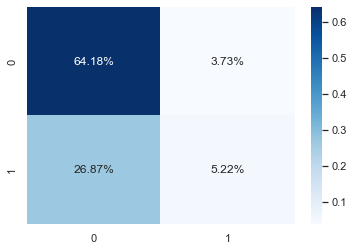

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns; sns.set_theme()
cf_matrix = confusion_matrix(y1,out)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [72]:
# weight = new_weight.tolist()

In [73]:
print(weights)
print(bias)

[[ 0.13222545]
 [ 0.01286913]
 [-0.02776367]
 [-0.00861748]
 [-0.00020436]
 [ 0.02227871]
 [ 0.00254237]
 [-0.01989787]]
[-0.90075237]


In [74]:
# # def sigmoid_tx(acc,pk,X_input,weight,bias,cont_address,abi):
# contract = web3.eth.contract(address=cont_address,abi=abi)
# # getting IXWB
# nonce = web3.eth.getTransactionCount(account1)
# print(type(X_input),type(weight),type(bias))
# tx_IXWB = contract.functions.compute_IXWB(X_input,weight,bias
#     ).buildTransaction({
#     'gas': 100000,
#     'gasPrice': web3.toWei('1', 'gwei'),
#     'from': account1,
#     'nonce': nonce
#     }) 
# signed_txn = web3.eth.account.signTransaction(tx_IXWB, private_key=private_key1)
# start_time = time.time()
# tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
# tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
# end_time = time.time()
# print(end_time -start_time)
# out_num,out_den = contract.functions.add_print().call()

# # getting sigmoid
# nonce= web3.eth.getTransactionCount(account1)
# tx_sigmoid = contract.functions.compute_sigmoid(
#     out_num
#      ).buildTransaction({
#     'gas': 70000,
#     'gasPrice': web3.toWei('1', 'gwei'),
#     'from': account1,
#     'nonce': nonce
#     }) 
# signed_txn = web3.eth.account.signTransaction(tx_sigmoid, private_key=private_key1)
# start_time = time.time()
# tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
# tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
# end_time = time.time()
# print(end_time -start_time)
# pred = contract.functions.predict_print().call()
# #     return pred

In [75]:
# print (X1, w,b,)
# b = b.tolist()
nw  = w[:,0].astype(int)
nw = nw.tolist()
print (X1, nw,b)

[[  2 117  90 ...  25  31  21]
 [  3  84  72 ...  37  26  28]
 [  6   0  68 ...  39  72  41]
 ...
 [  5 121  72 ...  26  24  30]
 [  1 126  60 ...  30  34  47]
 [  1  93  70 ...  30  31  23]] [132, 12, -27, -8, 0, 22, 2, -19] [-900, 1000]


In [76]:
pred =[]
ropsten_IXWB_time=[]
ropsten_sigmoid_time=[]
ropsten_IXWB_gasuse=[]
ropsten_sigmoid_gasuse=[]

for i in range(1):
    print(i)
    inputs = X1[i].tolist()
    print(inputs)
#     pred.append(sigmoid_tx(account1, private_key1,inputs,weight,bias,cont_address,abi))
    contract = web3.eth.contract(address=cont_address,abi=abi)
#     print(inputs,nw,b)
    nonce = web3.eth.getTransactionCount(account1)
#     print(type(inputs),type(nw),type(b))
    tx_IXWB = contract.functions.compute_IXWB(
        inputs,nw,b
        ).buildTransaction({
        'gas': 1000000,
        'gasPrice': web3.toWei('100', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(tx_IXWB, private_key=private_key1)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()
    ropsten_IXWB_time.append(end_time -start_time)
    print(end_time -start_time)
    ropsten_IXWB_gasuse.append(tx_receipt.gasUsed)
    print(tx_receipt.gasUsed)
    out_num,out_den = contract.functions.add_print().call()

    # getting sigmoid
    nonce= web3.eth.getTransactionCount(account2)
    tx_sigmoid = contract.functions.compute_sigmoid(
        out_num
         ).buildTransaction({
        'gas': 1000000,
        'gasPrice': web3.toWei('100', 'gwei'),
        'from': account2,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(tx_sigmoid, private_key=private_key2)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()
    ropsten_sigmoid_time.append(end_time -start_time)
    print(end_time -start_time)
    ropsten_sigmoid_gasuse.append(tx_receipt.gasUsed)
    print(tx_receipt.gasUsed)
    pred.append(contract.functions.predict_print().call())
    inputs.clear()
   

0
[2, 117, 90, 19, 71, 25, 31, 21]
8.400018453598022
48934
21.92115306854248
24042


In [77]:
print(pred)

[0]


In [78]:
print(accuracy_score(y1, pred))

ValueError: Found input variables with inconsistent numbers of samples: [268, 1]

In [ ]:
# print(sigmoid_time)
# print(sigmoid_gasuse)

In [ ]:
# import pandas as pd
# df = pd.DataFrame(sigmoid_time)
# df.to_csv("testfile",index=False)


In [ ]:
# a = pd.DataFrame(ropsten_sigmoid_time)
# a.to_csv("sigmoid_time_ropsten.csv",index=False)
# a = pd.DataFrame(ropsten_sigmoid_gasuse)
# a.to_csv("sigmoid_gasuse_ropsten.csv",index=False)
# a = pd.DataFrame(ropsten_IXWB_time)
# a.to_csv("IXWB_time_ropsten.csv",index=False)
# a = pd.DataFrame(ropsten_IXWB_gasuse)
# a.to_csv("IXWB_gasuse_ropsten.csv",index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf_matrix = confusion_matrix(y1,pred)

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y1,pred))